## Importing all necessary Libraries

In [1]:
!pip install yellowbrick


In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization and plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter

import datetime as dt
from datetime import datetime

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


## Data preparation & preprocessing.

In [3]:
df = pd.read_csv("bank_data_C.csv")


In [4]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [6]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [8]:
duplicate= df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [TransactionID, CustomerID, CustomerDOB, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
Index: []


### Convert data types to the correct format

In [9]:
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], dayfirst=True)
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], dayfirst=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [11]:
df["TransactionDate"].unique()

array(['2016-08-02T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-08-09T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-10-21T00:00:00.000000000', '2016-10-16T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-17T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-29T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-22T00:00:00.000000000',
       '2016-09-23T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-27

In [12]:
df["CustomerDOB"].unique()

array(['1994-01-10T00:00:00.000000000', '2057-04-04T00:00:00.000000000',
       '1996-11-26T00:00:00.000000000', ...,
       '2065-07-18T00:00:00.000000000', '2042-05-15T00:00:00.000000000',
       '2044-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
def calculate_age(df):
    # Subtract year of birth from transaction year
    df["Age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
    return df

In [14]:
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Observe and correct customer with negative age values

In [15]:
df[df["Age"] <= 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-10-08
15        2068-07-10
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-10-05
1041591   2071-10-05
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [16]:
def adjust_year(date):
    if pd.notnull(date) and date.year > 2016:
        return date.replace(year=date.year - 100)
    return date

In [17]:
df["CustomerDOB"] = df["CustomerDOB"].apply(adjust_year)

In [18]:
df = calculate_age(df)
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


In [19]:
print(f"The Minimum DOB is: {df['CustomerDOB'].min()}")
print(f"The Maximum DOB is: {df['CustomerDOB'].max()}")

The Minimum DOB is: 1800-01-01 00:00:00
The Maximum DOB is: 2016-02-22 00:00:00


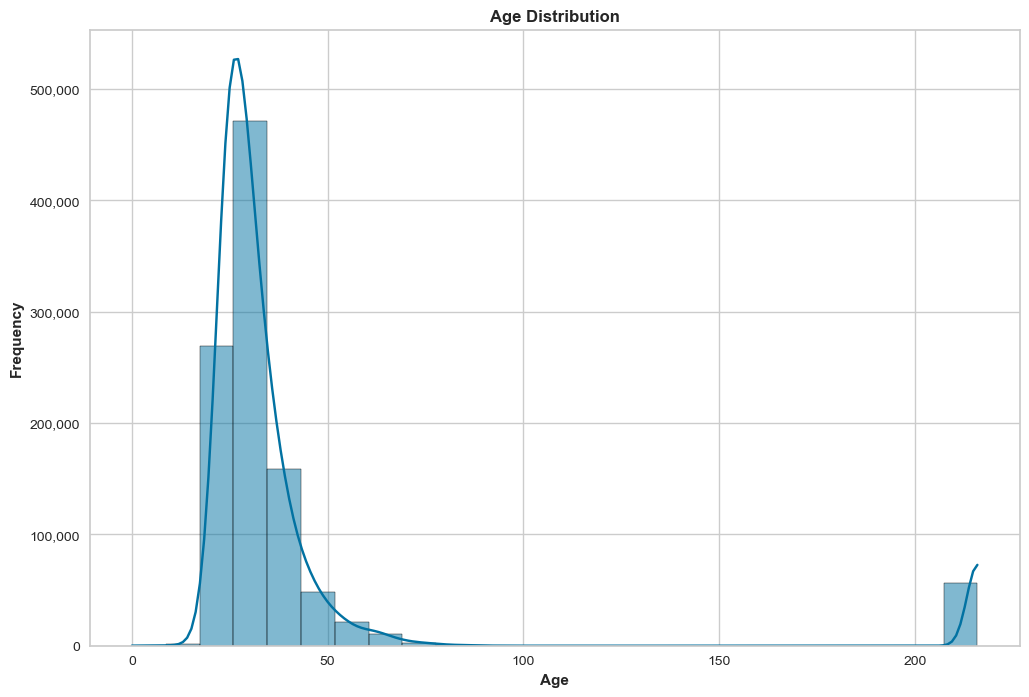

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(df["Age"], bins=25, kde=True)
plt.xlabel("Age", fontweight ='bold')          
plt.ylabel("Frequency", fontweight ='bold')     
plt.title("Age Distribution", fontweight ='bold')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Age Distribution.png", format='png', dpi=300)
plt.show()

In [21]:
df[df["Age"] > 100]["CustomerDOB"]

16        1800-01-01
22        1800-01-01
28        1800-01-01
34        1800-01-01
150       1800-01-01
             ...    
1041491   1800-01-01
1041500   1800-01-01
1041578   1800-01-01
1041580   1800-01-01
1041587   1800-01-01
Name: CustomerDOB, Length: 56292, dtype: datetime64[ns]

In [22]:
df[df["Age"] > 100]["CustomerDOB"].unique()

array(['1800-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [23]:
def replace_age_outlier(df):
    DOB_threshold = 1900

    # Find rows where year of birth is less than the threshold
    age_outliers = df[df["CustomerDOB"].dt.year < DOB_threshold].index

    # Calculate the mean of valid DOBs
    median_DOB = df.loc[~df.index.isin(age_outliers), "CustomerDOB"].median()

    # Replace outlier DOBs with the mean DOB
    df.loc[age_outliers, "CustomerDOB"] = median_DOB

    return df

In [24]:
# Fix any age outliers
df = replace_age_outlier(df)

# Recalculate age after fixing DOBs
df = calculate_age(df)

In [25]:
df['Age'].unique()

array([22, 59, 20, 43, 28, 44, 24, 34, 32, 38, 48, 29, 27, 25, 31, 23, 30,
       49, 37, 39, 19, 33, 26, 36, 35, 50, 41, 21, 42, 45, 84, 57, 17, 51,
       75, 62, 46, 40, 95, 47, 12, 73, 18, 65, 56, 60, 63, 69, 16, 52, 68,
       54, 64, 61, 55, 80, 53, 74, 72, 78, 67, 58, 66, 70, 14, 71, 79,  9,
       15, 77, 76,  3, 13, 11,  6,  5, 83, 82, 89, 97, 88, 86,  7, 85, 87,
       81,  1,  0, 10,  8,  4, 93, 90, 92, 94,  2, 96, 91, 98],
      dtype=int64)

In [26]:
cust_age = df.groupby('Age')['CustomerID'].nunique().reset_index(name='Count')
cust_age

,Age,Count
0,0,2
1,1,25
2,2,10
3,3,27
4,4,28
...,...,...
94,94,3
95,95,22
96,96,2
97,97,7


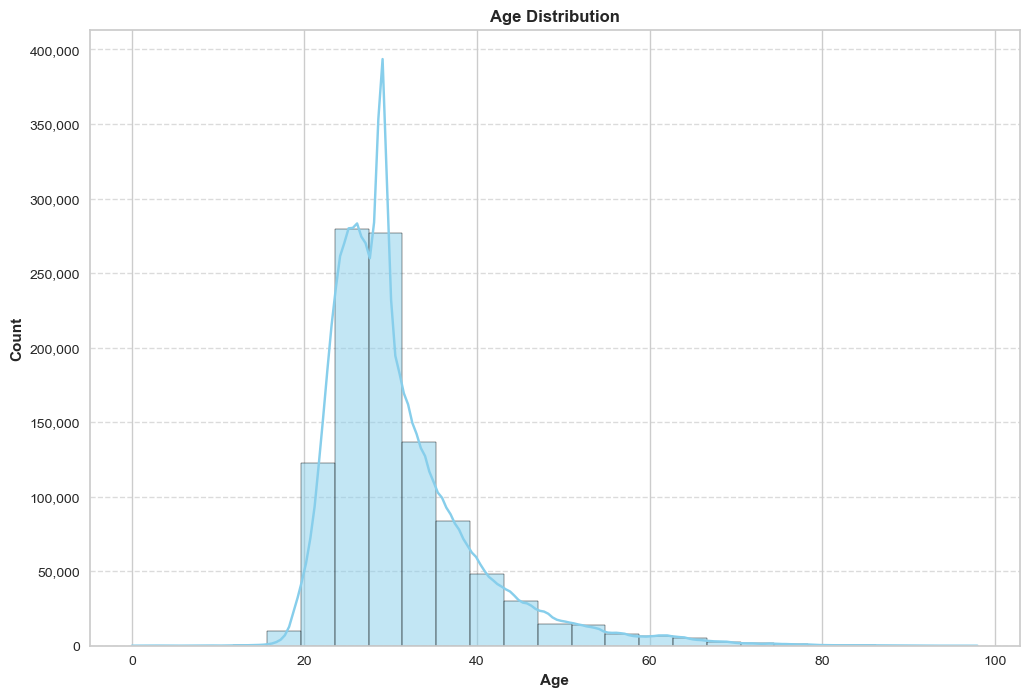

In [27]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=25, kde=True, color='skyblue')
plt.title('Age Distribution', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Age Distribution 2.png", format='png', dpi=300)
plt.show()

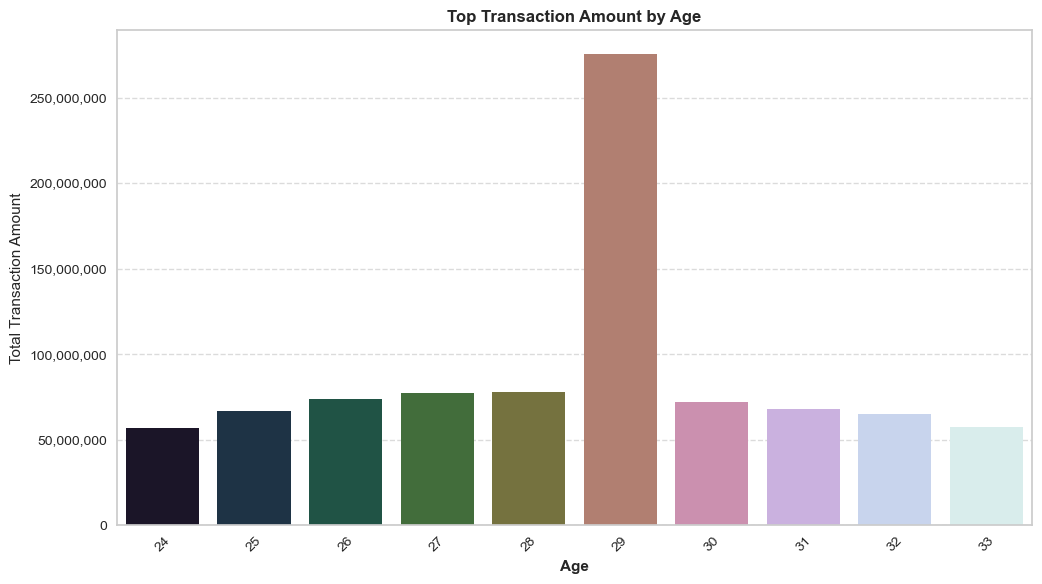

In [28]:
customer_sales = df.groupby('Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_sales, x='Age', y='TransactionAmount (INR)', palette='cubehelix')
plt.title('Top Transaction Amount by Age', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Top Transaction Amount by Age.png", format='png', dpi=300)
plt.show()

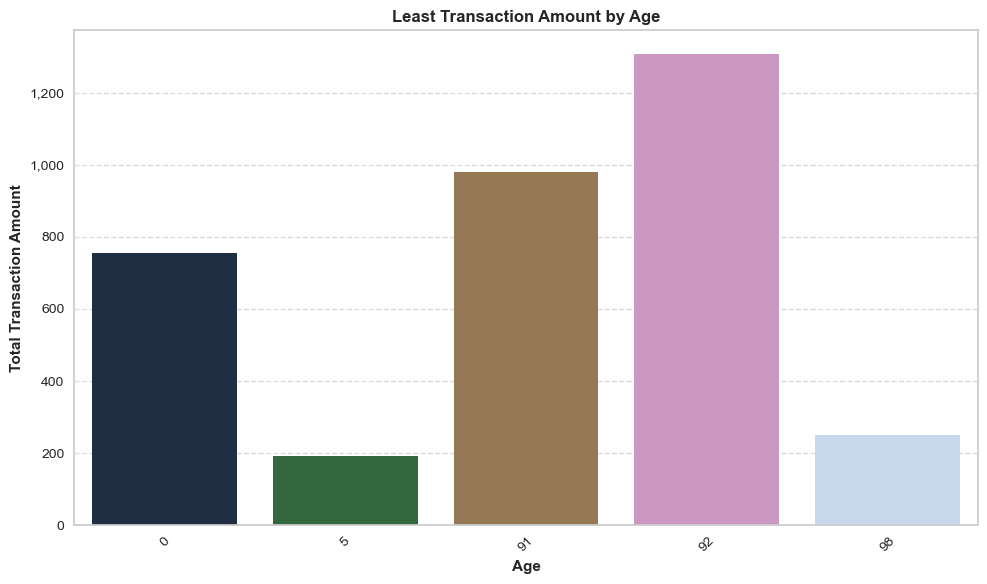

In [29]:
customer_sales = df.groupby('Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False).tail(5).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_sales, x='Age', y='TransactionAmount (INR)', palette='cubehelix')
plt.title('Least Transaction Amount by Age', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Total Transaction Amount', fontweight = 'bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Least Transaction Amount by Age.png", format='png', dpi=300)
plt.show()

## Gender

In [30]:
df["CustGender"].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [31]:
df["CustGender"] = df["CustGender"].replace('T','M')

In [32]:
df["CustGender"].value_counts()

M    760979
F    280635
Name: CustGender, dtype: int64

## Location

In [33]:
df["CustLocation"].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

## Account Balance

In [34]:
df["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

## Transaction Amount

In [35]:
df["TransactionAmount (INR)"].sort_values(ascending = True)

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [36]:
(df["TransactionAmount (INR)"] == 0).sum()


820

In [37]:
df.drop(df[df["TransactionAmount (INR)"] == 0].index, axis=0, inplace=True)

In [38]:
(df["TransactionAmount (INR)"] == 0).sum()

0

In [39]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


## Exploratory Data Analysis

## Date

In [40]:
df["CustomerID"].unique()

array(['C5841053', 'C2142763', 'C4417068', ..., 'C8020229', 'C6459278',
       'C6420483'], dtype=object)

In [41]:
df.shape

(1040794, 10)

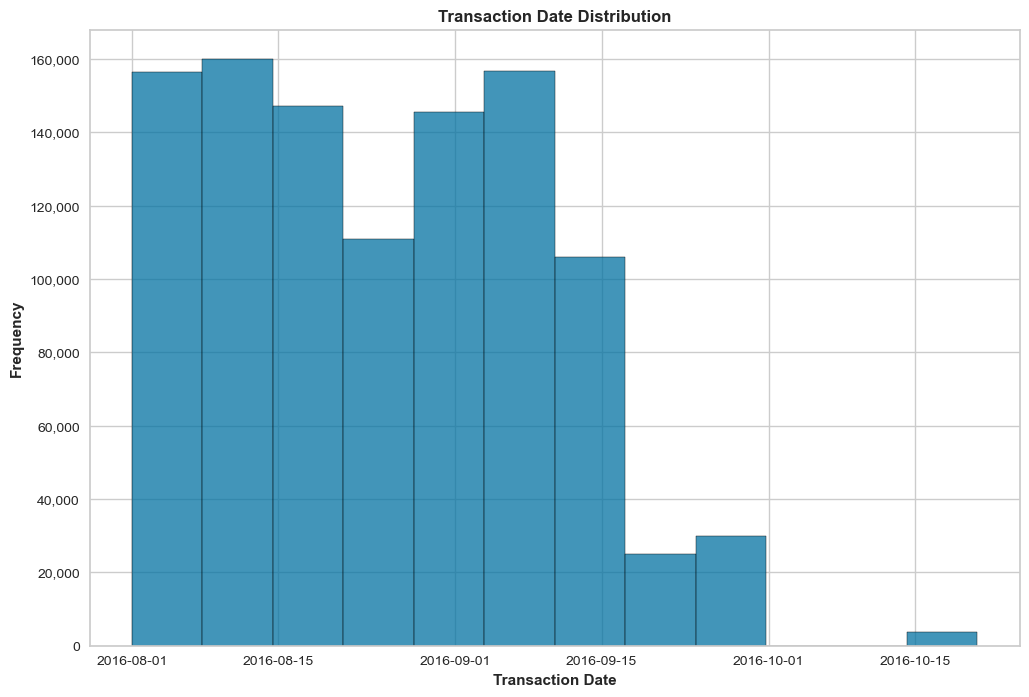

In [42]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(df["TransactionDate"], bins=12, kde = False)
plt.xlabel("Transaction Date", fontweight ='bold')           
plt.ylabel("Frequency", fontweight ='bold')     
plt.title("Transaction Date Distribution", fontweight ='bold')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Transaction Date Distribution 2.png", format='png', dpi=300)
plt.show()

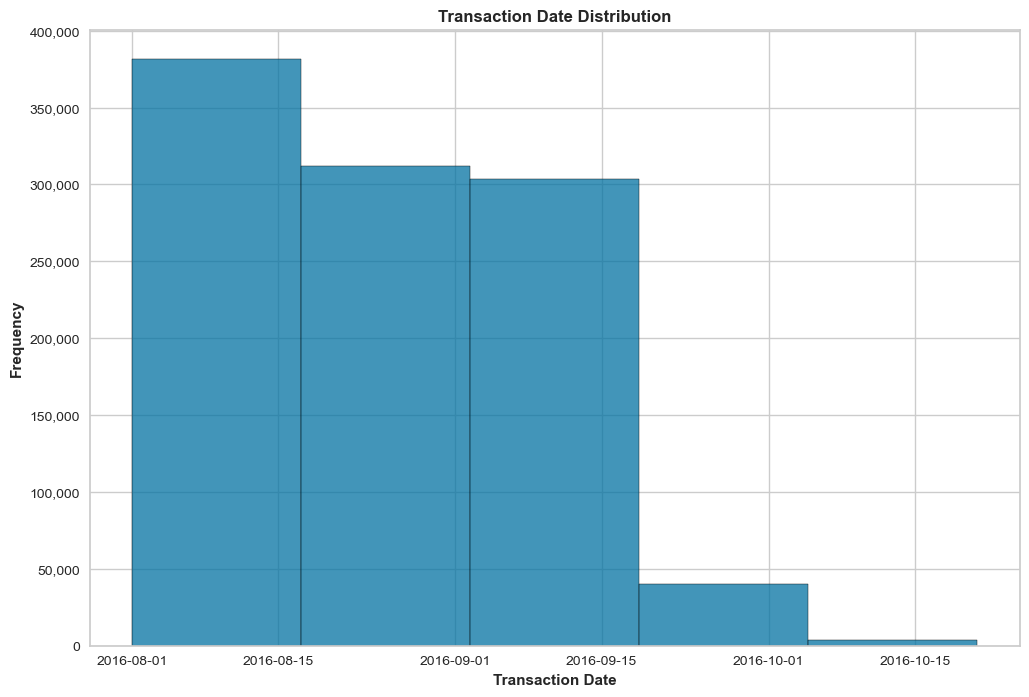

In [43]:
#plot a distribution for data across the uniquetransaction date
plt.figure(figsize=(12, 8))
sns.histplot(df["TransactionDate"], bins=5, kde = False)
plt.xlabel("Transaction Date", fontweight ='bold')           
plt.ylabel("Frequency", fontweight ='bold')     
plt.title("Transaction Date Distribution", fontweight ='bold')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Transaction Date Distribution.png", format='png', dpi=300)
plt.show()

## Gender

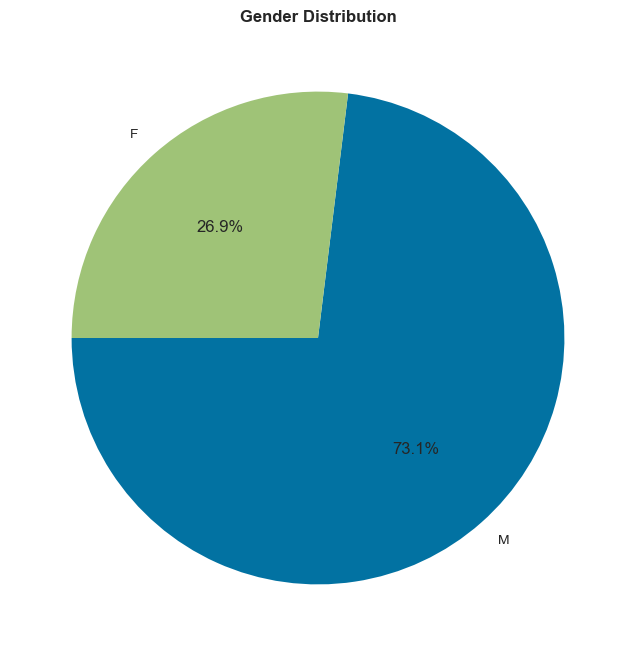

In [44]:
gender_count = df['CustGender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_count,
    labels=gender_count.index,
    autopct='%1.1f%%',
    startangle=180
)
plt.title("Gender Distribution", fontweight ='bold')
plt.ylabel('') 
plt.savefig("Gender Distribution.png", format='png', dpi=300)
plt.show()

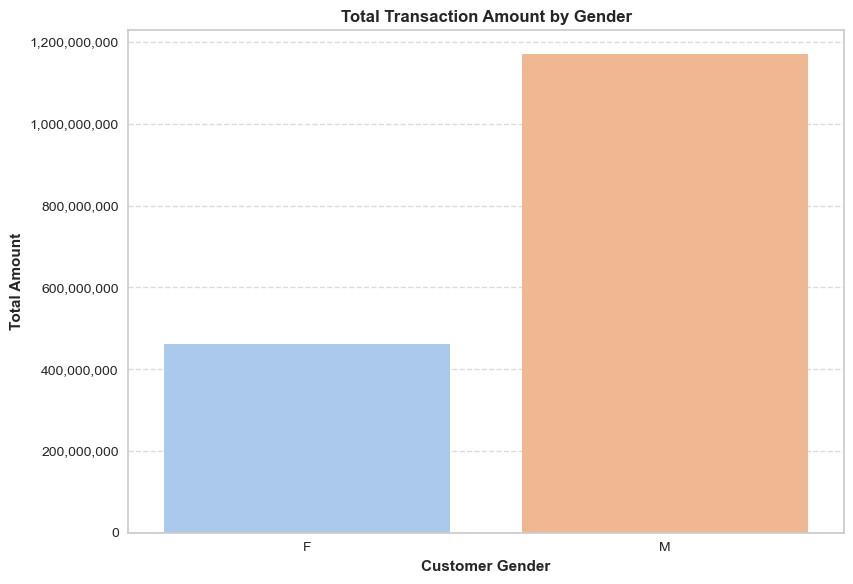

In [45]:
customer_sales = df.groupby('CustGender')['TransactionAmount (INR)'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=customer_sales, x='CustGender', y='TransactionAmount (INR)', palette='pastel')
plt.title('Total Transaction Amount by Gender', fontweight = 'bold')
plt.xlabel('Customer Gender', fontweight = 'bold')
plt.ylabel('Total Amount', fontweight = 'bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Total Transaction Amount by Gender.png", format='png', dpi=300)
plt.show()


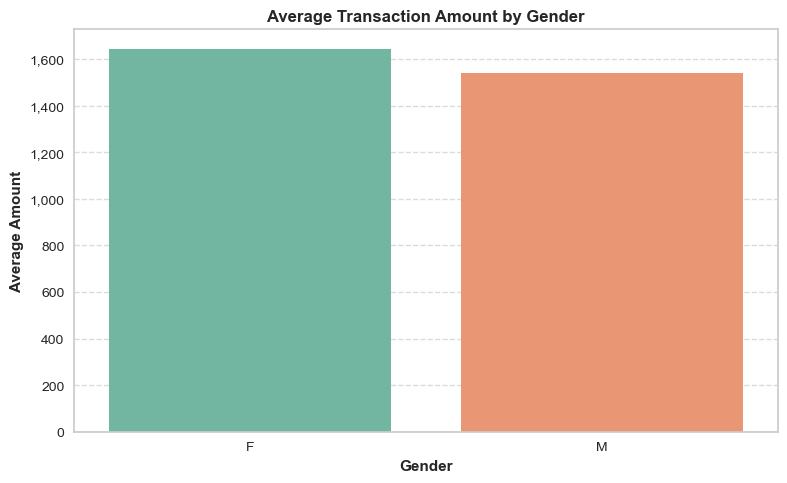

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df.groupby('CustGender')['TransactionAmount (INR)'].mean().reset_index(),
    x='CustGender',
    y='TransactionAmount (INR)',
    palette='Set2'
)
plt.title("Average Transaction Amount by Gender", fontweight ='bold')
plt.xlabel("Gender", fontweight ='bold')
plt.ylabel("Average Amount", fontweight ='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Average Transaction Amount by Gender.png", format='png', dpi=300)
plt.show()

## Location

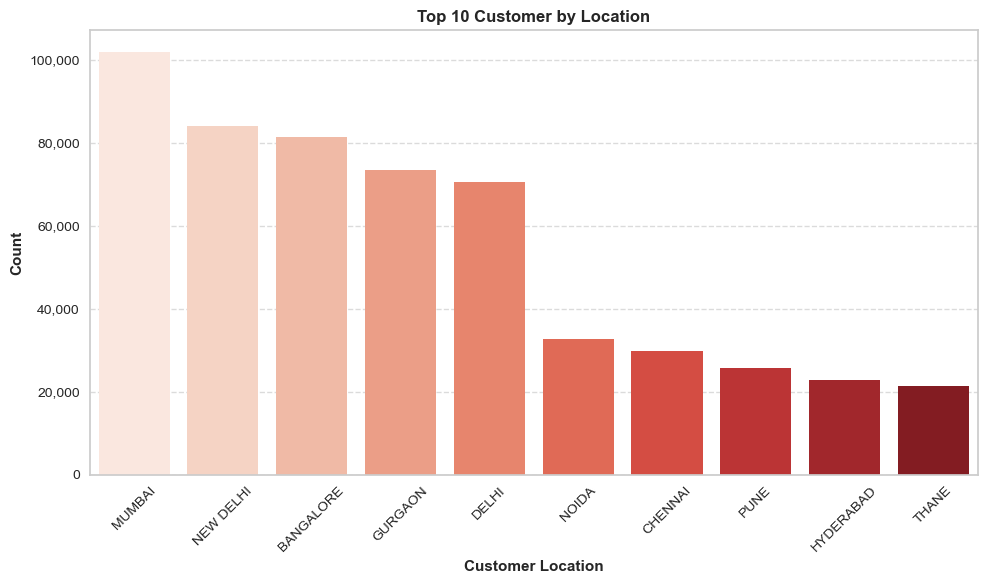

In [47]:
location_count = df['CustLocation'].value_counts().reset_index()
location_count.columns = ['CustLocation', 'Count']

# Filter to only include top N locations (i.e, top 10 locations)
top_n = 10
top_location_count = location_count.head(top_n)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='CustLocation', y='Count', data=top_location_count, palette='Reds')

# Add labels and title
plt.title(f"Top {top_n} Customer by Location", fontweight ='bold')
plt.xlabel("Customer Location", fontweight ='bold')
plt.ylabel("Count", fontweight ='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Top 10 Customer by Location.png", format='png', dpi=300)
plt.show()


## Transaction

In [48]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20


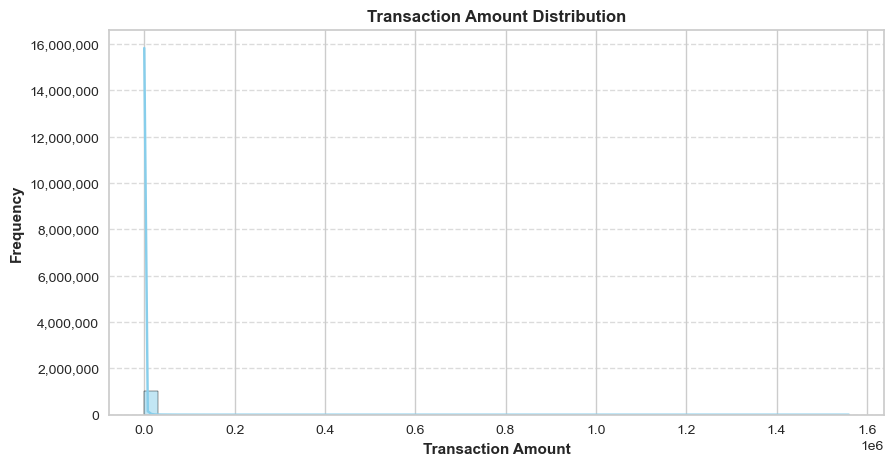

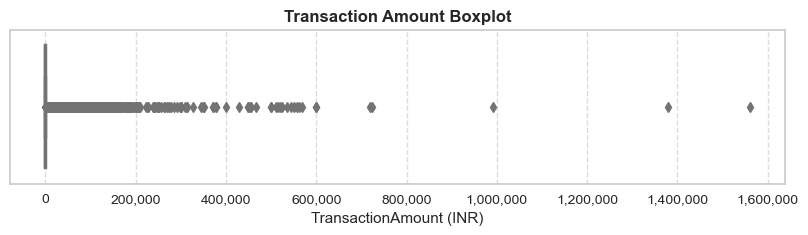

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionAmount (INR)'], bins=50, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution', fontweight ='bold')
plt.xlabel('Transaction Amount', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Transaction Amount Distribution.png", format='png', dpi=300)
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TransactionAmount (INR)'], color='lightgreen')
plt.title('Transaction Amount Boxplot', fontweight = 'bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Transaction Amount Boxplot.png", format='png', dpi=300)
plt.show()


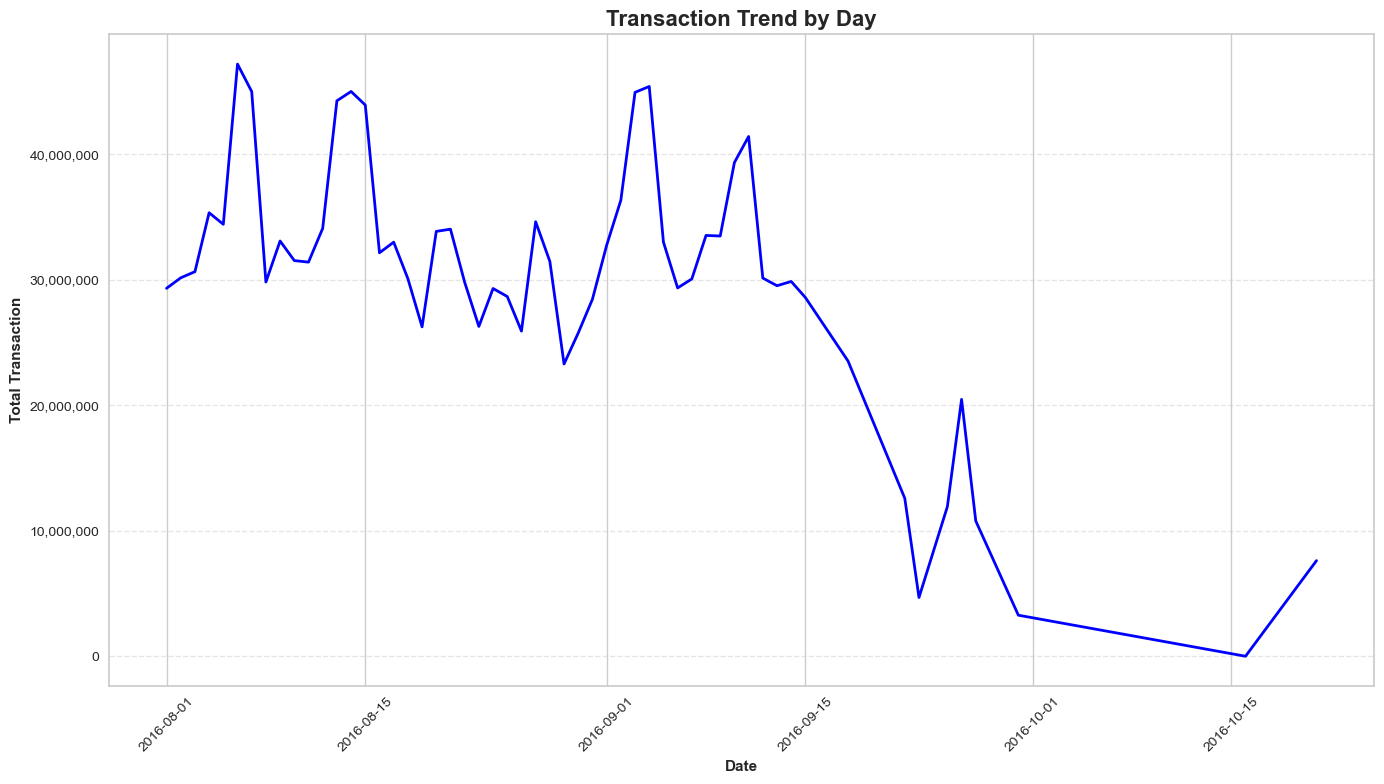

In [50]:

def format_with_commas(x, _):
    return f'{x:,.0f}'

daily_sales = df.groupby('TransactionDate')['TransactionAmount (INR)'].sum().reset_index()


# Plot line chart
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=daily_sales,
    x='TransactionDate',
    y='TransactionAmount (INR)',
    color='Blue',
    linewidth=2
)

# Titles and labels
plt.title("Transaction Trend by Day", fontsize=16, fontweight ='bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Total Transaction", fontweight ='bold')

# Improve x-axis label readability
plt.xticks(rotation=45)

# Add grid and layout tweaks
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  
plt.tight_layout()
# plt.savefig("Transaction Trend by Day.png", format='png', dpi=300)
plt.show()


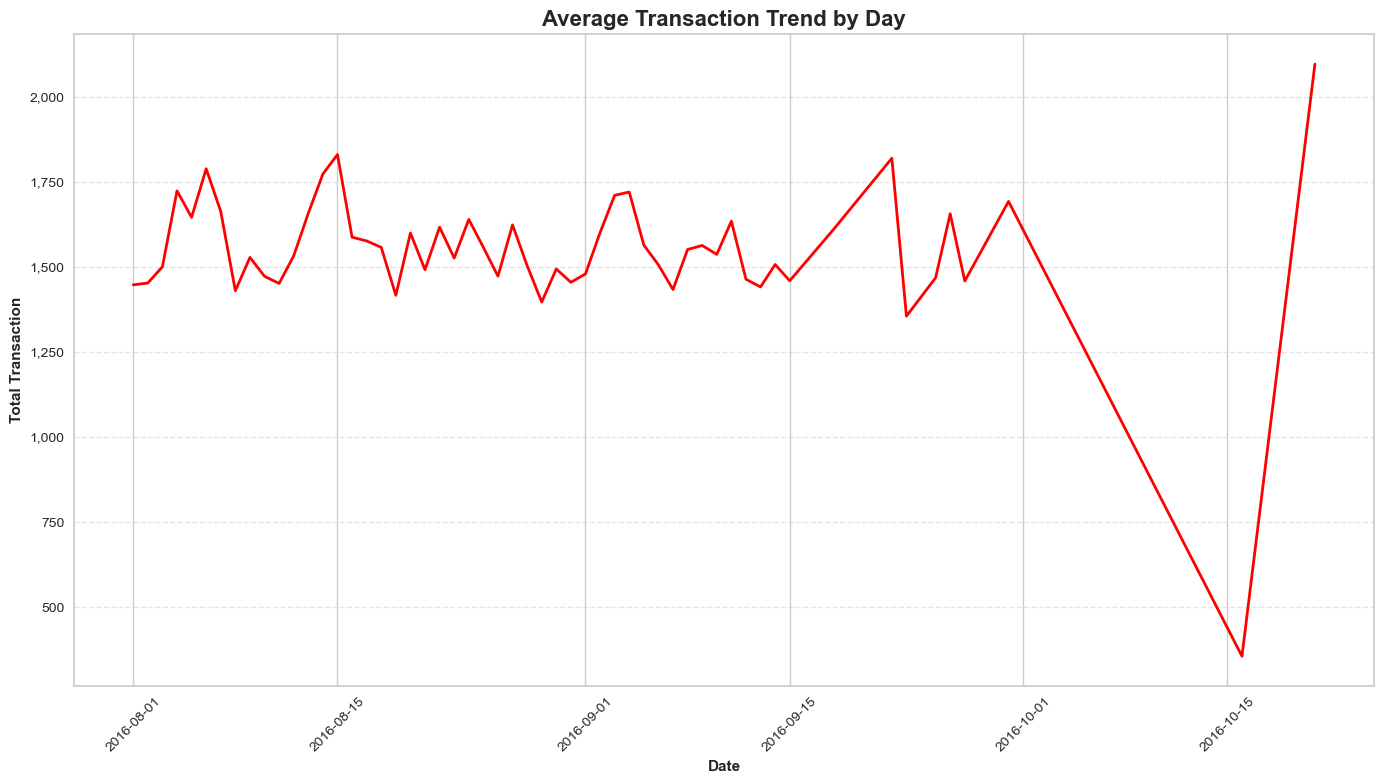

In [51]:
daily_sales = df.groupby('TransactionDate')['TransactionAmount (INR)'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(
    data=daily_sales,
    x='TransactionDate',
    y='TransactionAmount (INR)',
    color='red',
    linewidth=2
)


plt.title("Average Transaction Trend by Day", fontsize=16, fontweight ='bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Total Transaction", fontweight ='bold')

# Improve x-axis label readability
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) #apply comma
#Add grid and layout tweaks
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig("Average Transaction Trend by Day.png", format='png', dpi=300)
plt.show()

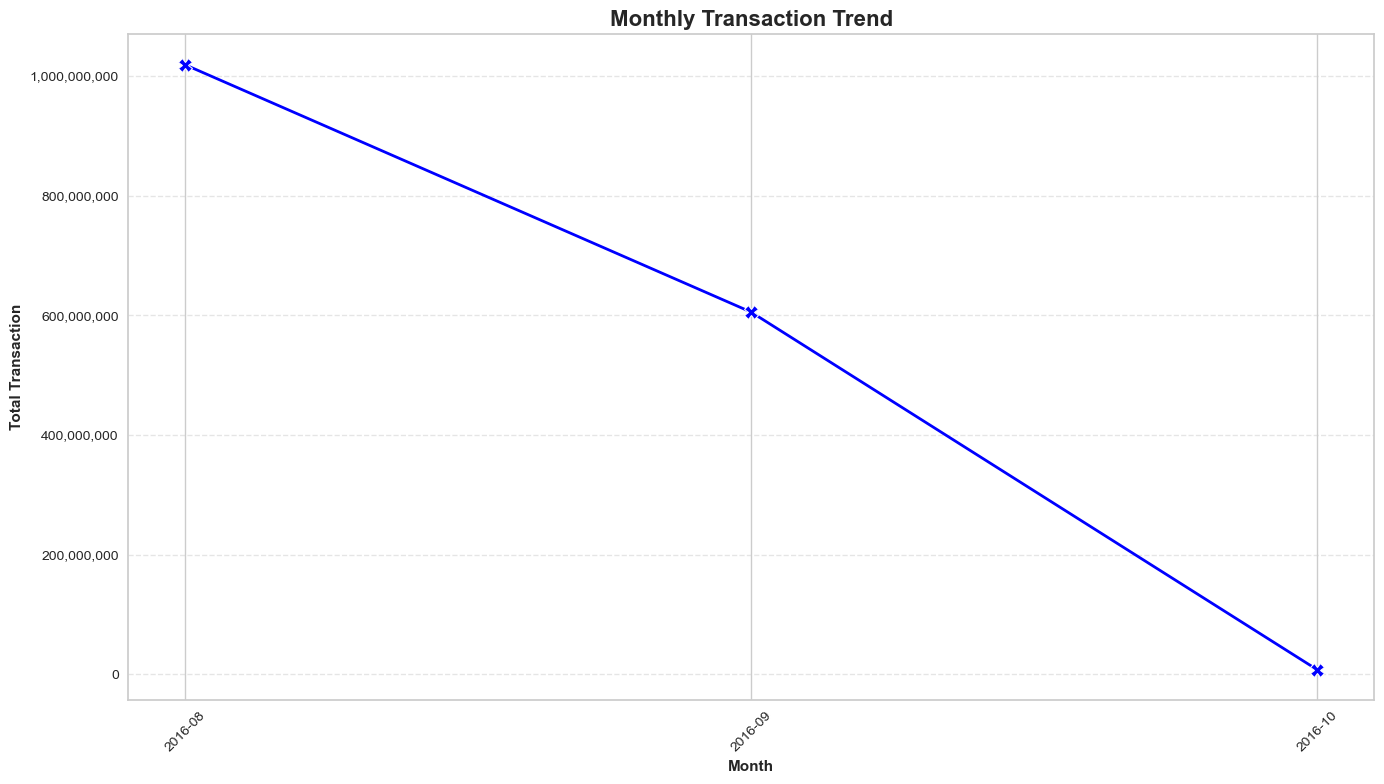

In [52]:
# Format y-axis with commas
def format_with_commas(x, _):
    return f'{x:,.0f}'

# Ensure 'TransactionDate' is datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Create 'YearMonth' column for grouping
df['YearMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)

# Group by 'YearMonth'
monthly_sales = df.groupby('YearMonth')['TransactionAmount (INR)'].sum().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sales,
    x='YearMonth',
    y='TransactionAmount (INR)',
    color='blue',
    linewidth=2,
    marker='X',
    markersize=10 
)

plt.title("Monthly Transaction Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Total Transaction", fontweight='bold')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
# plt.savefig("Monthly Transaction Trend.png", format='png', dpi=300)
plt.show()


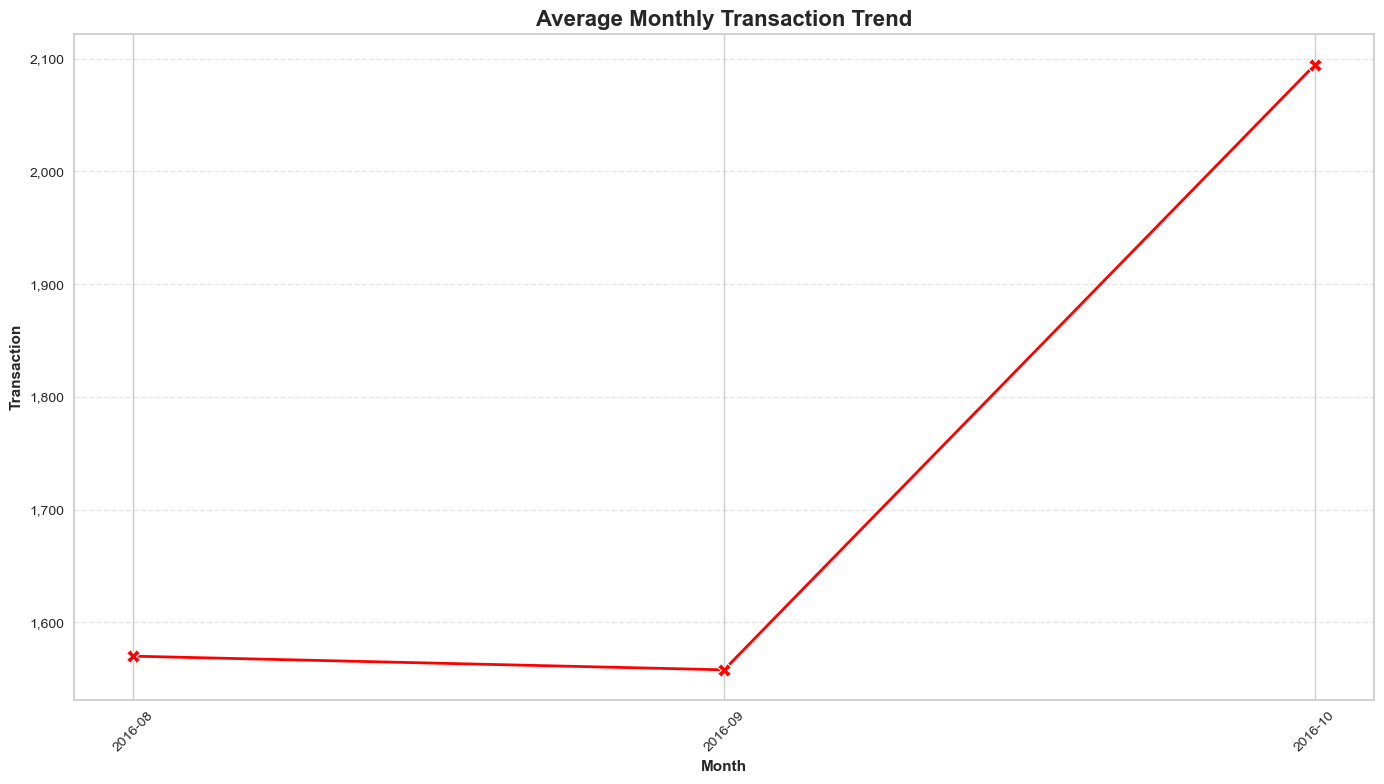

In [53]:
# Format y-axis with commas
def format_with_commas(x, _):
    return f'{x:,.0f}'

# Ensure 'TransactionDate' is datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Create 'YearMonth' column for grouping
df['YearMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)

# Group by 'YearMonth'
monthly_sales = df.groupby('YearMonth')['TransactionAmount (INR)'].mean().reset_index()

# Plot with markers
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sales,
    x='YearMonth',
    y='TransactionAmount (INR)',
    color='red',
    linewidth=2,
    marker='X',# Add marker here
    markersize=10 
)

plt.title("Average Monthly Transaction Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Transaction", fontweight='bold')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
# plt.savefig("Average Monthly Transaction Trend.png", format='png', dpi=300)
plt.show()

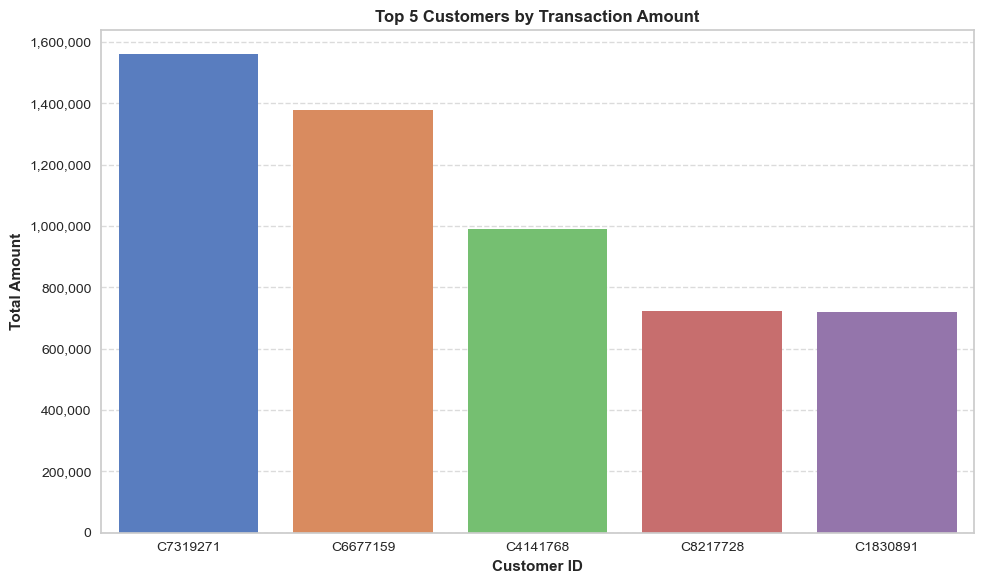

In [54]:
top_customers = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='CustomerID', y='TransactionAmount (INR)', palette='muted')
plt.title('Top 5 Customers by Transaction Amount', fontweight='bold')
plt.xlabel('Customer ID', fontweight='bold')
plt.ylabel('Total Amount', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
# plt.savefig("Top 5 Customers by Transaction Amount.png", format='png', dpi=300)
plt.show()


## RFM - Recency, Frequency, and Monetary value Analysis


## Recency

In [55]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,YearMonth
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,2016-08
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,2016-08
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,2016-08
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,2016-08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,2016-08


In [56]:
print(f"The Last Transaction date is : {df['TransactionDate'].min()}")
print(f"The Firsttransaction Date is : {df['TransactionDate'].max()}")

The Last Transaction date is : 2016-08-01 00:00:00
The Firsttransaction Date is : 2016-10-21 00:00:00


In [57]:
# Define 'day' as today's date
day = datetime.now()

# Calculate Recency
recency = df.groupby("CustomerID").agg({
    "TransactionDate": lambda x: (day - x.max()).days + 1
})


In [58]:
recency.head()

,TransactionDate
CustomerID,
C1010011,3141
C1010012,3184
C1010014,3191
C1010018,3152
C1010024,3180


In [59]:
print(recency.empty)

False


In [60]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors="coerce")

In [61]:
print(df["CustomerID"].nunique())

878763


In [62]:
print(recency)

            TransactionDate
CustomerID                 
C1010011               3141
C1010012               3184
C1010014               3191
C1010018               3152
C1010024               3180
...                     ...
C9099836               3191
C9099877               3152
C9099919               3180
C9099941               3170
C9099956               3142

[878763 rows x 1 columns]


## Frequency

In [63]:
frequency = df.groupby("CustomerID")["TransactionID"].count()

In [64]:
frequency.head()

CustomerID
C1010011    2
C1010012    1
C1010014    2
C1010018    1
C1010024    1
Name: TransactionID, dtype: int64

## Monetary value

In [65]:
monetary = df.groupby("CustomerID")["TransactionAmount (INR)"].sum()

In [66]:
monetary.head()

CustomerID
C1010011    5106.0
C1010012    1499.0
C1010014    1455.0
C1010018      30.0
C1010024    5000.0
Name: TransactionAmount (INR), dtype: float64

## RFM Table

In [67]:
RFM_table = pd.concat([recency, frequency, monetary], axis=1)

In [68]:
RFM_table.head()

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,3141,2,5106.0
C1010012,3184,1,1499.0
C1010014,3191,2,1455.0
C1010018,3152,1,30.0
C1010024,3180,1,5000.0


In [69]:
RFM_table = RFM_table.rename(columns={
    "TransactionDate": "Recency", 
    "TransactionID": "Frequency", 
    "TransactionAmount (INR)": "Monetary"
})

In [70]:
RFM_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,3141,2,5106.0
C1010012,3184,1,1499.0
C1010014,3191,2,1455.0
C1010018,3152,1,30.0
C1010024,3180,1,5000.0


In [71]:
RFM_table.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

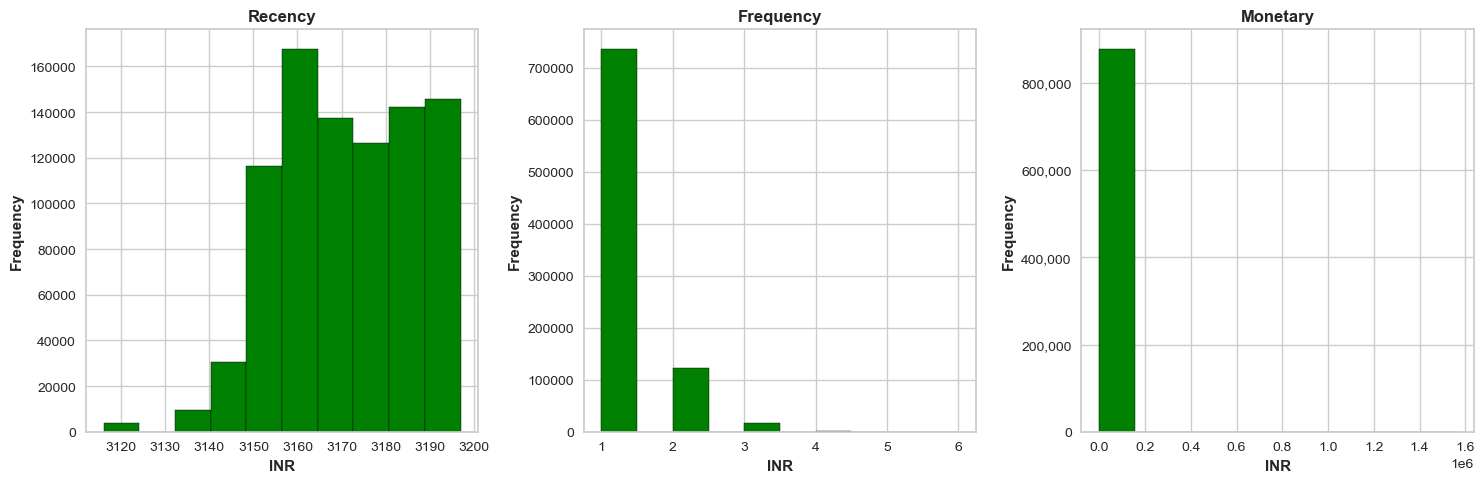

In [72]:
# Explore RFM Table
fig, axis = plt.subplots(1, 3, figsize=(15, 5))  
columns = ["Recency", "Frequency", "Monetary"]  

for i, col in enumerate(columns):  # Use enumerate to loop through columns
    axis[i].hist(RFM_table[col], bins=10, color="green", edgecolor="black")  # Fix parameters
    axis[i].set_title(col, fontweight='bold') 
    axis[i].set_xlabel("Days" if col == "recency" else "Count" if col == "frequency" else "INR", fontweight='bold')  # Conditional label
    axis[i].set_ylabel("Frequency", fontweight='bold') 
    
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()  
# plt.savefig("Frequency,Receccy and Monetary.png", format='png', dpi=300)
plt.show()

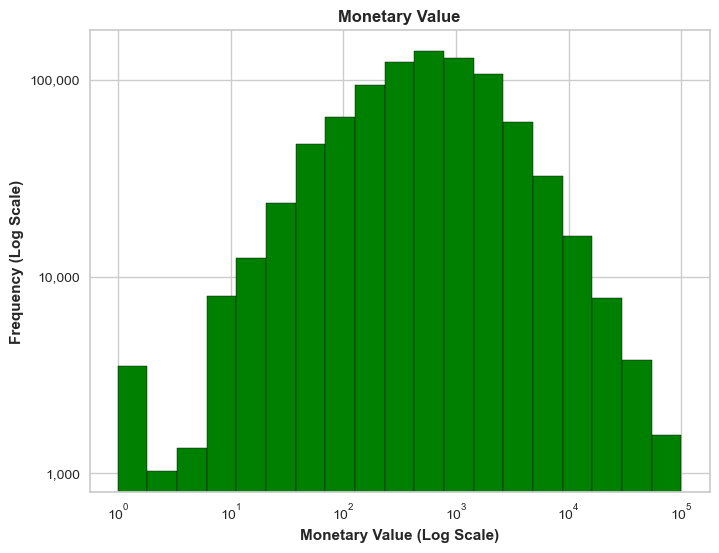

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(RFM_table["Monetary"], bins=np.logspace(0, 5, 20), color="green", edgecolor="black")  
plt.title("Monetary Value", fontweight='bold')
plt.xlabel("Monetary Value (Log Scale)", fontweight='bold') 
plt.ylabel("Frequency (Log Scale)", fontweight='bold')     
plt.xscale("log")
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig("Monetary Value.png", format='png', dpi=300)
plt.show()

## Observe correlation

In [74]:
RFM_table.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.223293,-0.020675
Frequency,-0.223293,1.000000,0.097491
Monetary,-0.020675,0.097491,1.000000


# RFM score

In [75]:
RFM_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,3141,2,5106.0
C1010012,3184,1,1499.0
C1010014,3191,2,1455.0
C1010018,3152,1,30.0
C1010024,3180,1,5000.0


In [76]:
# Calculate quartiles for each RFM component
quartiles = RFM_table[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75]).to_dict()

In [77]:
quartiles

{'Recency': {0.25: 3159.0, 0.5: 3171.0, 0.75: 3184.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [78]:
RFM_table["Frequency"].value_counts()

1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: Frequency, dtype: int64

In [79]:
def assign_R_score(x, feature):
    """this function is used to assign recency score
    the more recent a customer's latest transaction is, the higher the recency score"""

    if x <= quartiles[feature][0.25]:
        return 4
    elif x <= quartiles[feature][0.5]:
        return 3
    elif x <= quartiles[feature][0.75]:
        return 2
    else:
        return 1

def assign_M_score(x, feature):
    """This function is used for assigning monetary score.
    the higher the monetary value, the higher the monetary score"""

    if x <= quartiles[feature][0.25]:
        return 1
    elif x <= quartiles[feature][0.5]:
        return 2
    elif x <= quartiles[feature][0.75]:
        return 3
    else:
        return 4

In [80]:
def custom_frequency_score(x):
    """This function is used for assigning frequency score.
    frequency of 1,2 and 3 are assgned scores of 1,2 and 3 respectively
    and frequency of 4,5,and 6 are assigned scores of 4"""

    if x <= 3:
        return x
    else:
        return 4

In [81]:
# Assign quartile scores for recency
RFM_table['R_score'] = RFM_table['Recency'].apply(lambda x: assign_R_score(x, 'Recency'))

# Assign custom Frequency scores
RFM_table['F_score'] = RFM_table['Frequency'].apply(custom_frequency_score)

# Assign quartile scores for monetary component
RFM_table['M_score'] = RFM_table['Monetary'].apply(lambda x: assign_M_score(x, 'Monetary'))

In [82]:
# Calculate the RFM score by combining the three individual scores
RFM_table['RFM_group'] = RFM_table['R_score'].astype(str) + RFM_table['F_score'].astype(str) + RFM_table['M_score'].astype(str)

In [83]:
RFM_table.head(3)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group
CustomerID,,,,,,,
C1010011,3141,2,5106.0,4,2,4,424
C1010012,3184,1,1499.0,2,1,3,213
C1010014,3191,2,1455.0,1,2,3,123


In [84]:
RFM_table["RFM_score"] = RFM_table[['R_score', 'M_score', 'F_score']].sum(axis = 1)

In [85]:
RFM_table.head(3)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group,RFM_score
CustomerID,,,,,,,,
C1010011,3141,2,5106.0,4,2,4,424,10
C1010012,3184,1,1499.0,2,1,3,213,6
C1010014,3191,2,1455.0,1,2,3,123,6


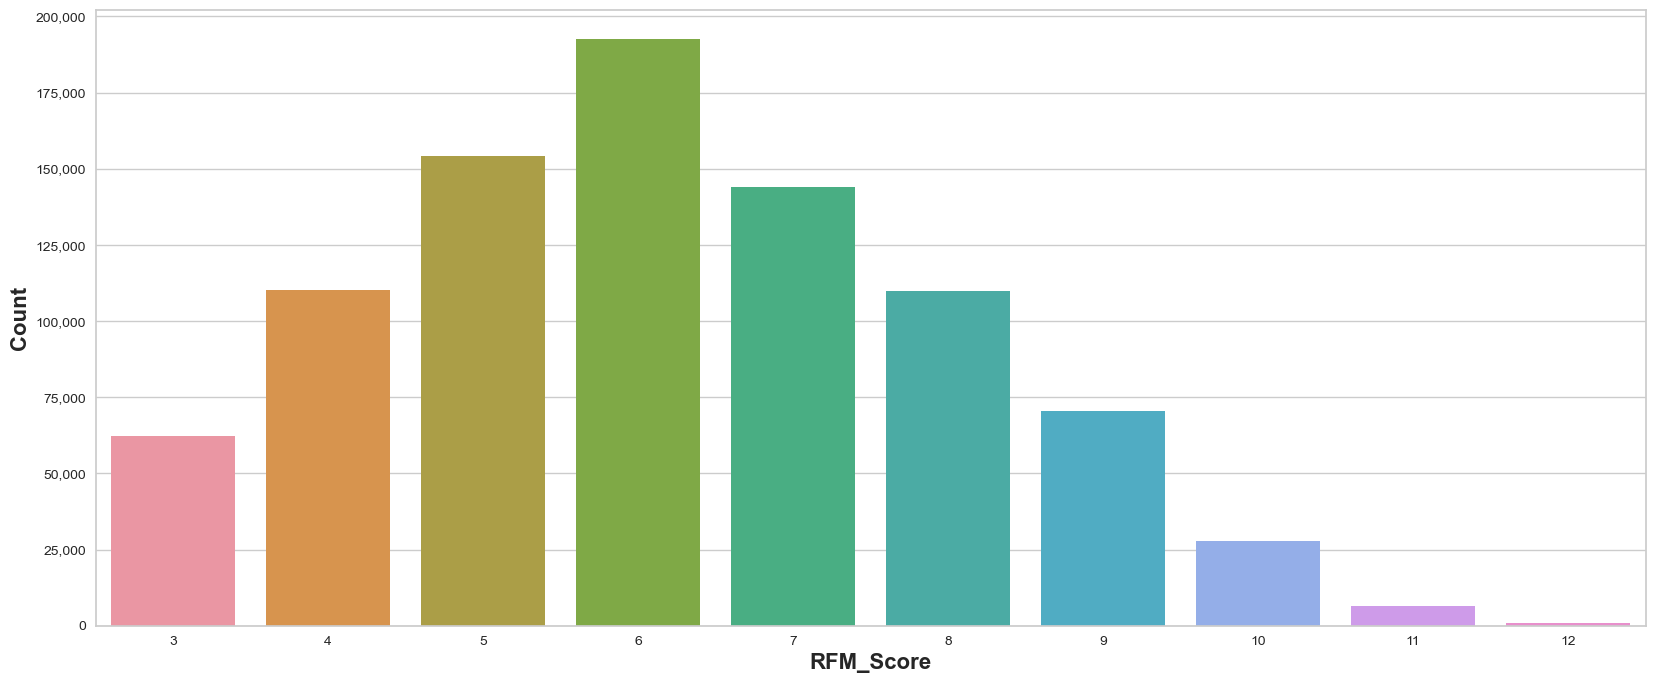

In [86]:
plt.figure(figsize = (20,8))

sns.countplot( x = RFM_table["RFM_score"])
plt.xlabel("RFM_Score",fontsize =16, fontweight='bold')
plt.ylabel("Count", fontweight='bold',fontsize =16)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("RFM_Score.png", format='png', dpi=300)
plt.show()

In [87]:
def assign_segments(x):
    if x <= 5:
        return "low"
    elif x <= 9:
        return "medium"
    else:
        return "high"

In [88]:
RFM_table["segments"] = RFM_table["RFM_score"].apply(lambda x: assign_segments(x))

In [89]:
RFM_table.head(3)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group,RFM_score,segments
CustomerID,,,,,,,,,
C1010011,3141,2,5106.0,4,2,4,424,10,high
C1010012,3184,1,1499.0,2,1,3,213,6,medium
C1010014,3191,2,1455.0,1,2,3,123,6,medium


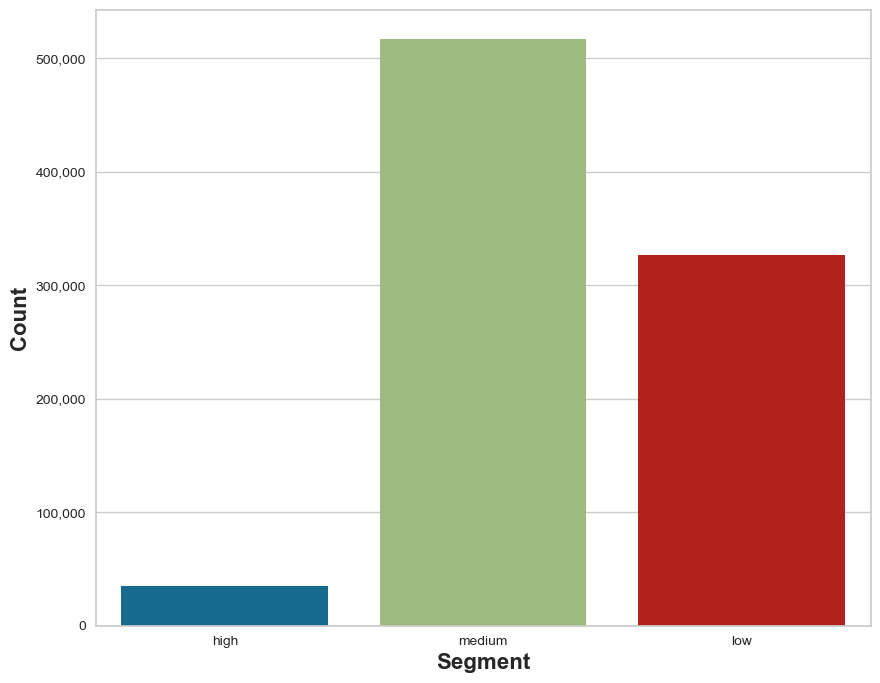

In [90]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["segments"])
plt.xlabel("Segment",fontsize =16, fontweight='bold')
plt.ylabel("Count", fontweight='bold',fontsize =16)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Segment Chart.png", format='png', dpi=300)
plt.show()

In [91]:
RFM_table['weighted_score'] = (RFM_table['R_score'] * 2) + (RFM_table["F_score"] * 1) + (RFM_table['M_score'] * 1)
RFM_table.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_group,RFM_score,segments,weighted_score
CustomerID,,,,,,,,,,
C1010011,3141,2,5106.0,4,2,4,424,10,high,14
C1010012,3184,1,1499.0,2,1,3,213,6,medium,8
C1010014,3191,2,1455.0,1,2,3,123,6,medium,7
C1010018,3152,1,30.0,4,1,1,411,6,medium,10
C1010024,3180,1,5000.0,2,1,4,214,7,medium,9


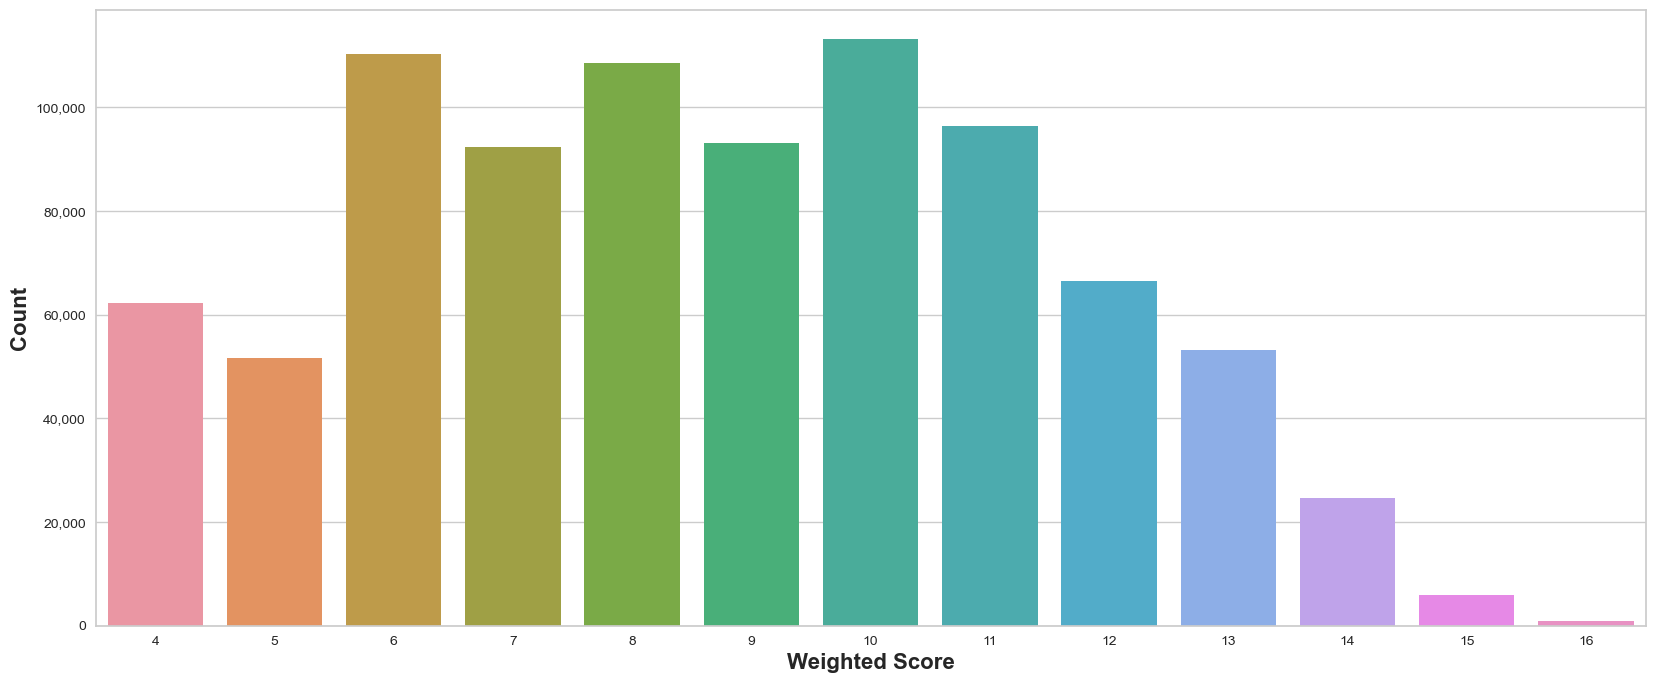

In [92]:
plt.figure(figsize=(20, 8))
sns.countplot(x=RFM_table["weighted_score"])
plt.xlabel("Weighted Score", fontweight='bold', fontsize =16)
plt.ylabel("Count", fontweight='bold', fontsize =16)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Weighted Score.png", format='png', dpi=300)
plt.show()


In [93]:
RFM_table["weighted_segments"] = RFM_table["weighted_score"].apply(lambda x: assign_segments(x))

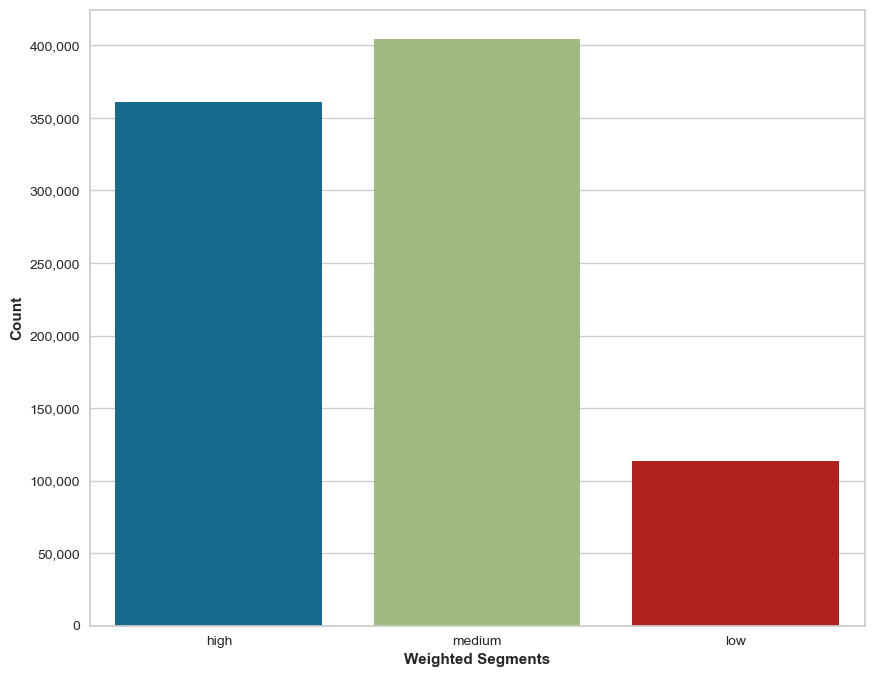

In [94]:
plt.figure(figsize = (10,8))
sns.countplot( x = RFM_table["weighted_segments"])
plt.xlabel("Weighted Segments", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Weighted Segments.png", format='png', dpi=300)
plt.show()


## K-means Customer segmentation

In [95]:
RFM_data = RFM_table.drop(["RFM_group", "segments", "weighted_score", "weighted_segments"], axis = 1)
RFM_data.head(2)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
C1010011,3141,2,5106.0,4,2,4,10
C1010012,3184,1,1499.0,2,1,3,6


## Implement standard scaling

In [96]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_data)

In [97]:
scaled_data

array([[-1.99039095,  1.8173276 ,  0.45193522, ...,  1.82368347,
         1.34172808,  2.0708205 ],
       [ 0.83352617, -0.41084172, -0.04969314, ..., -0.41175149,
         0.45881674, -0.10052404],
       [ 1.2932336 ,  1.8173276 , -0.05581225, ...,  1.82368347,
         0.45881674, -0.10052404],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734, ..., -0.41175149,
        -1.30700594, -1.18619632],
       [-0.08588871, -0.41084172, -0.25120672, ..., -0.41175149,
        -1.30700594, -0.64336018],
       [-1.92471846, -0.41084172, -0.13925473, ..., -0.41175149,
         0.45881674,  0.98514823]])

## Implement clustering algorithm

In [98]:
model = KMeans(random_state = 1)

## using distortion metric

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(1, 10),
                 timings=False)

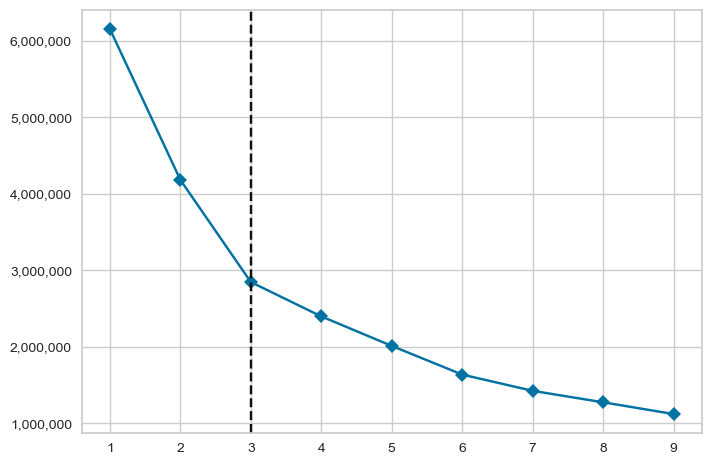

In [99]:
plot_model = KElbowVisualizer(model, k=(1,10), metric='distortion', timings=False)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Distortion Metric.png", format='png', dpi=300)
plot_model.fit(scaled_data)

## Using calinski_harabasz metric

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=6, random_state=1), k=(2, 7),
                 metric='calinski_harabasz', timings=False)

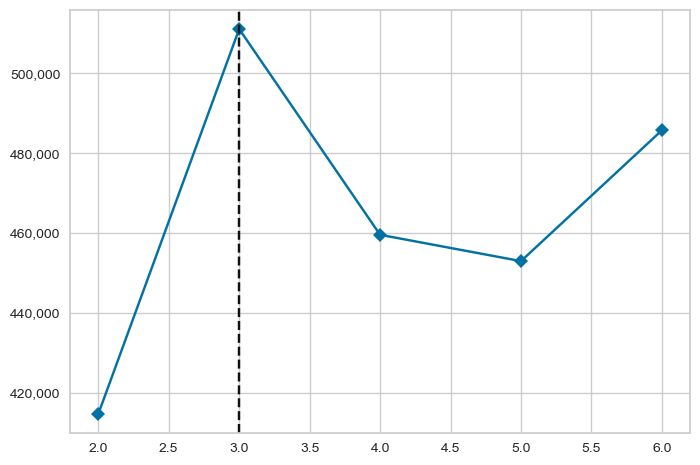

In [100]:
plot_model_2 = KElbowVisualizer(model, k=(2,7), metric='calinski_harabasz', timings=False)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("calinski_harabasz metric.png", format='png', dpi=300)
plot_model_2.fit(scaled_data)

### both distortion and calinski_harabasz metric suggested 3 clusters as the optimal number of cluster for the data

## Cluster assignment

In [101]:
final_model = KMeans(random_state = 1, n_clusters = 3)
final_model.fit(scaled_data)

KMeans(n_clusters=3, random_state=1)

In [102]:
cluster_assignment = final_model.labels_
cluster_assignment

array([2, 0, 2, ..., 0, 1, 1])

In [103]:
RFM_data["Cluster"] = cluster_assignment
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Cluster
CustomerID,,,,,,,,
C1010011,3141,2,5106.0,4,2,4,10,2
C1010012,3184,1,1499.0,2,1,3,6,0
C1010014,3191,2,1455.0,1,2,3,6,2
C1010018,3152,1,30.0,4,1,1,6,1
C1010024,3180,1,5000.0,2,1,4,7,0


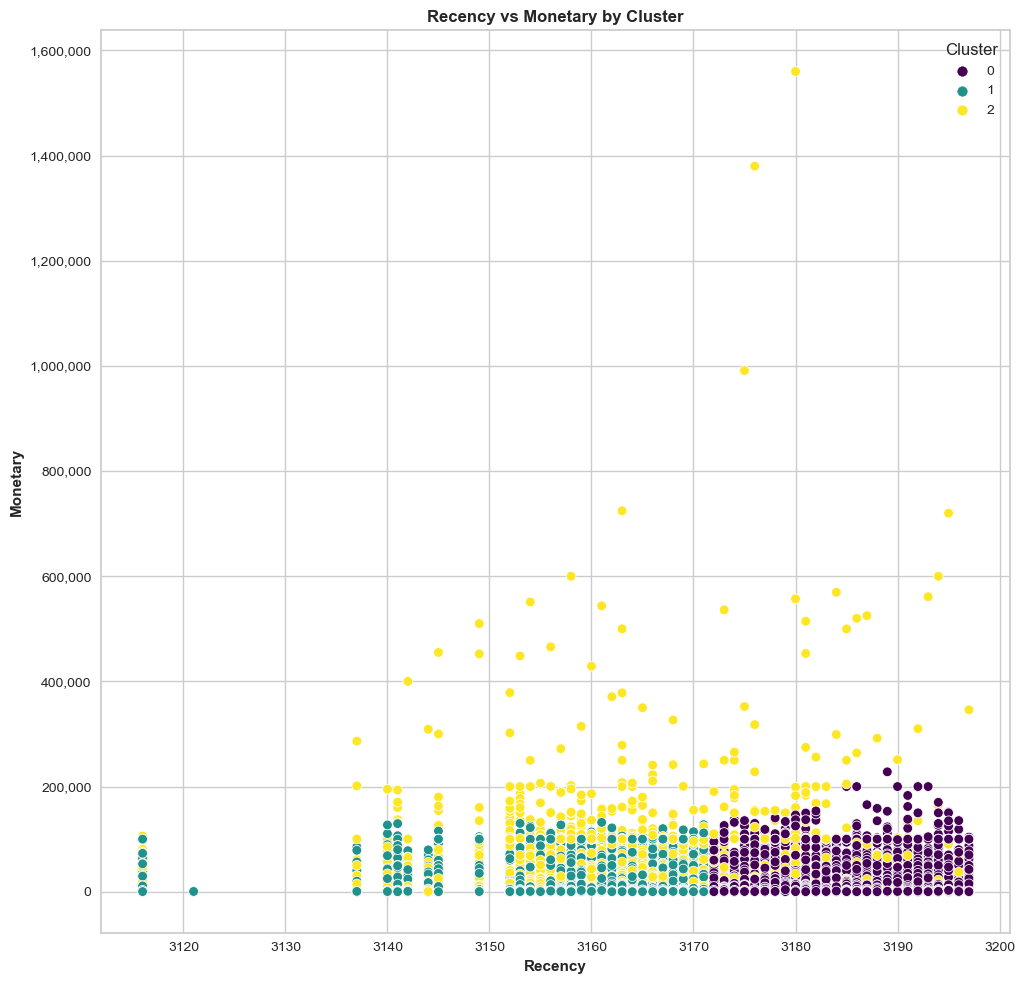

In [104]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=RFM_data, x="Recency", y="Monetary", hue="Cluster", palette='viridis')
plt.xlabel("Recency", fontweight='bold')
plt.ylabel("Monetary", fontweight='bold')

plt.title("Recency vs Monetary by Cluster", fontweight='bold')  
plt.legend(title="Cluster")
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Recency vs Monetary by Cluster.png", format='png', dpi=300)
plt.show()


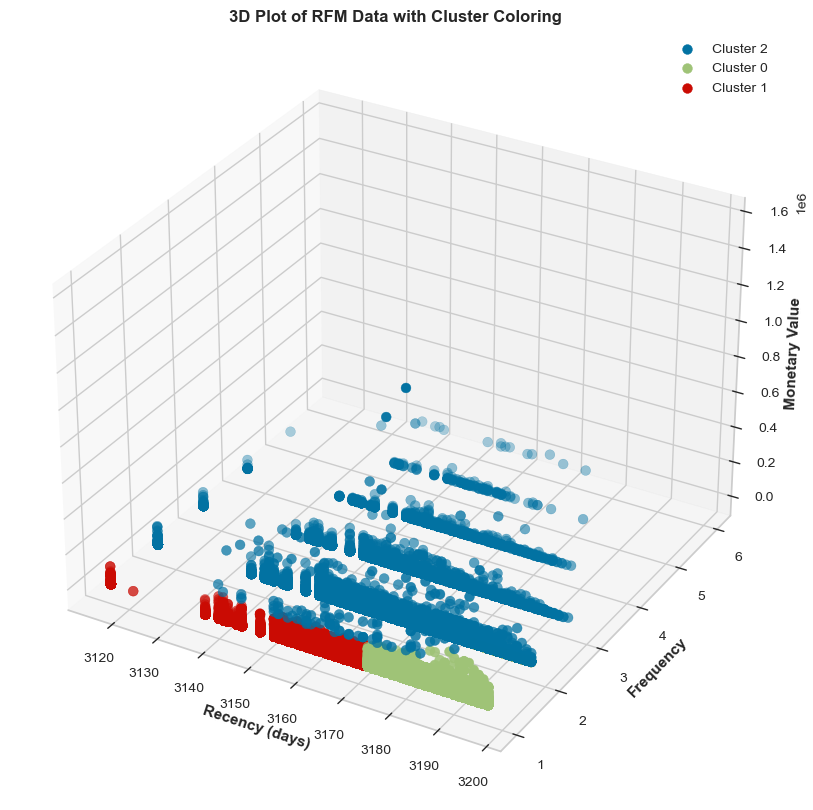

In [105]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different clusters
colors = ['b', 'g', 'r', 'y']

# Plot the RFM data points with different colors for each cluster
for cluster, color in zip(RFM_data["Cluster"].unique(), colors):
    cluster_data = RFM_data[RFM_data["Cluster"] == cluster]
    ax.scatter(cluster_data["Recency"], cluster_data["Frequency"], cluster_data["Monetary"], c=color,s=50, marker='o', label=f'Cluster {cluster}')

ax.set_xlabel('Recency (days)', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary Value', fontweight ='bold')


ax.legend()

# Set the plot title
plt.title('3D Plot of RFM Data with Cluster Coloring', fontweight ='bold')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("3D Plot of RFM Data with Cluster Coloring.png", format='png', dpi=300)

plt.show()

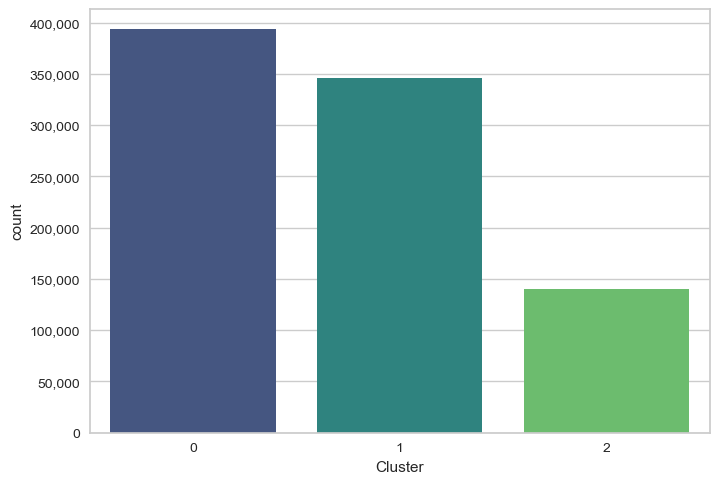

In [107]:
sns.countplot(x=RFM_data["Cluster"], palette= "viridis")
ax.set_xlabel('Cluster', fontweight ='bold')
ax.set_ylabel('Count', fontweight ='bold')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# plt.savefig("Cluster Chart.png", format='png', dpi=300)
plt.show()


### Compared to the customer segments we created using the RFM score alone, the segments gotten from the k-means technique has more fair distribution of customers.

In [108]:
#to oberserve descriptive statistics for each clusters
for cluster in RFM_data['Cluster'].unique():
    print(f"Cluster: {cluster}")
    print(RFM_data[RFM_data['Cluster'] == cluster].describe())

Cluster: 2
             Recency      Frequency      Monetary        R_score  \
count  139814.000000  139814.000000  1.398140e+05  139814.000000   
mean     3163.224577       2.144084  3.621687e+03       3.108165   
std        12.905761       0.394856  1.351224e+04       0.916134   
min      3116.000000       1.000000  2.000000e+00       1.000000   
25%      3155.000000       2.000000  6.793775e+02       2.000000   
50%      3162.000000       2.000000  1.450000e+03       3.000000   
75%      3172.000000       2.000000  3.076015e+03       4.000000   
max      3197.000000       6.000000  1.560035e+06       4.000000   

             F_score        M_score      RFM_score   Cluster  
count  139814.000000  139814.000000  139814.000000  139814.0  
mean        2.142876       3.257285       8.508325       2.0  
std         0.387317       0.860861       1.359920       0.0  
min         1.000000       1.000000       5.000000       2.0  
25%         2.000000       3.000000       8.000000       2.0 

In [109]:
cluster_0 = RFM_data[RFM_data["Cluster"] == 0]
cluster_1 = RFM_data[RFM_data["Cluster"] == 1]
cluster_2 = RFM_data[RFM_data["Cluster"] == 2]

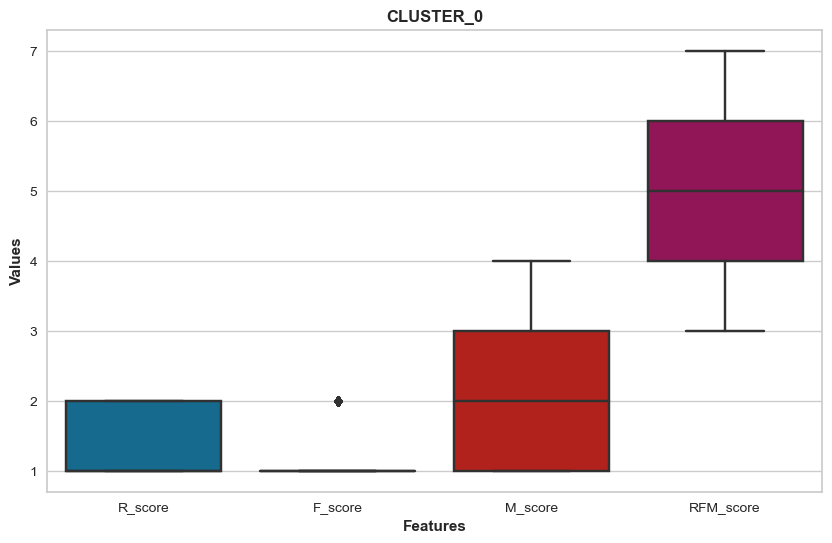

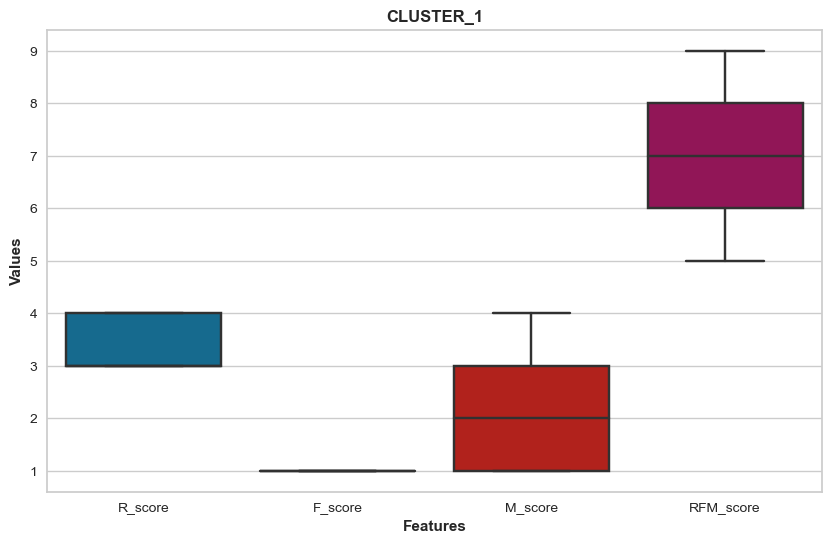

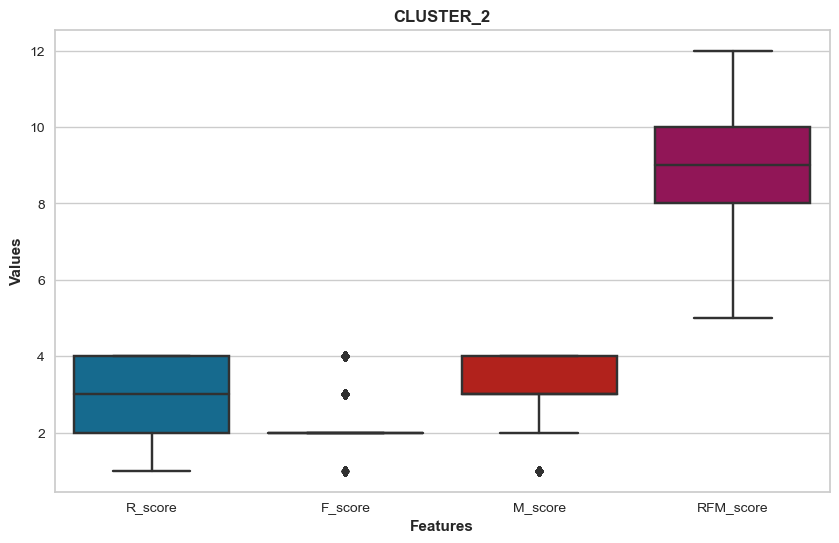

In [110]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=cluster_0[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"CLUSTER_0", fontweight ='bold')
plt.ylabel('Values', fontweight ='bold')
plt.xlabel('Features', fontweight ='bold')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# plt.savefig("Cluster 0.png", format='png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=cluster_1[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"CLUSTER_1", fontweight ='bold')
plt.ylabel('Values', fontweight ='bold')
plt.xlabel('Features', fontweight ='bold')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
# plt.savefig("Cluster 1.png", format='png', dpi=300)
plt.show()


plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.boxplot(data=cluster_2[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"CLUSTER_2", fontweight ='bold')
plt.ylabel('Values', fontweight ='bold')
plt.xlabel('Features', fontweight ='bold')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
# plt.savefig("Cluster 2.png", format='png', dpi=300)
plt.show()

### Cluster 2 has customers with better all round performance followed by cluster 1 and cluster 0 has customers with poor all round scores.